# 查看提交格式

在这里我们去看一下`starting_kit\test.csv`中的数据来理解一下最终的提交格式。但这里没有使用非极大值抑制，所以显示出来的bbox会有重叠较多的情况。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 读取数据，将第一行作为列名
submit_data = pd.read_csv('starting_kit/test.csv', header = 0)

In [2]:
# 查看数据基本信息
print("submit_data的列名为：\n", submit_data.keys())
print("submit_data的行数为：\n", len(submit_data))
print("submit_data的每一列的数据类型为：\n",submit_data.dtypes)
print("submit_data的前5行为：")
submit_data.head()

submit_data的列名为：
 Index(['image_id', 'predictions'], dtype='object')
submit_data的行数为：
 16362
submit_data的每一列的数据类型为：
 image_id        int64
predictions    object
dtype: object
submit_data的前5行为：


,image_id,predictions
0,45331,{265.362 70.297 335.99100000000004 165.1499999...
1,35639,{90.562 96.953 138.94299999999998 162.86599999...
2,33770,{407.708 119.523 446.774 166.555 0.58494 6}{41...
3,42479,{472.504 137.652 505.01300000000003 183.505 0....
4,44556,{447.187 46.098 521.98 83.03 0.65175 2}{453.01...


In [3]:
from utils.submit import bboxStrToList
bbox_list = bboxStrToList(submit_data['predictions'][0])
print("type(bbox_list): ", type(bbox_list))
print("bbox_list[0]: ", bbox_list[0])
print("len(bbox_list): ", len(bbox_list))

type(bbox_list):  <class 'list'>
bbox_list[0]:  [265.362, 70.297, 335.99100000000004, 165.14999999999998, 0.6416, 6]
len(bbox_list):  300


## 格式说明

在助教给出的文件中说明了：

结果文件为 csv 文件 。
结果保存格式为：

[image_id {x_l, y_l, x_r, y_r, conf, cls}{x_l, y_l, x_r, y_r, conf, cls}...]

- csv文件的每一行为一张测试图片的预测结果，在以上格式中为[]内部分
- `image_id` 为预测图片的id
- `x_l, y_l, x_r, y_r` 为你的预测框的左上角和右下角坐标
- `conf` 为该预测框的置信度
- `cls` 为该预测框的预测类别

## 使用plt可视化

In [4]:
submit_data['image_id'][0]

45331

In [16]:
from PIL import Image

img_idx = 9999  # 选择第几张图片
# 读取图片
show_img_id = submit_data['image_id'][img_idx]
# 找到show_img_id对应的图片
img = Image.open('./dl_detection/test/' + '%07d.jpg'%show_img_id)

# 查看图片基本信息
print("img.size: ", img.size)
print("img.mode: ", img.mode)
print("img.format: ", img.format)
print("img.getpixel((0, 0): ", img.getpixel((0, 0)))

# 查看bbox信息
bbox_list = bboxStrToList(submit_data['predictions'][img_idx])
print("type(bbox_list): ", type(bbox_list))
print("bbox_list[0]: ", bbox_list[0])
print("len(bbox_list): ", len(bbox_list))


img.size:  (640, 480)
img.mode:  RGB
img.format:  JPEG
img.getpixel((0, 0):  (98, 94, 82)
type(bbox_list):  <class 'list'>
bbox_list[0]:  [278.858, 170.712, 294.091, 203.457, 0.23142, 14]
len(bbox_list):  185


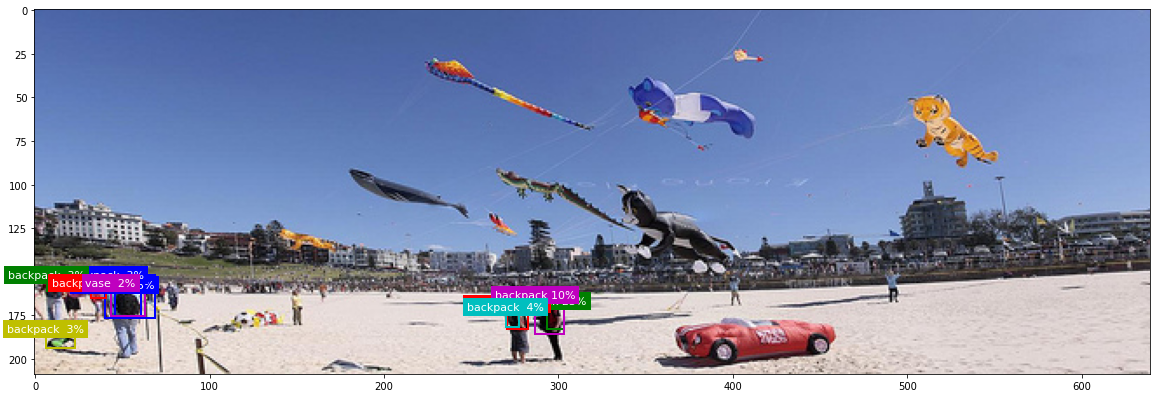

In [6]:
from utils.draw import draw_bboxs_with_conf
# 将排名前5个bbox画在图片上
bbox_num = 10
show_img_bboxs = []
show_img_labels = []
show_img_confs = []
for i in range(bbox_num):
    bbox = bbox_list[i]
    show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
    show_img_confs.append(bbox[4])
    show_img_labels.append(bbox[5])

# 画出bbox
plt.figure(figsize=(20, 10))
draw_bboxs_with_conf(
    img, 
    show_img_bboxs, 
    show_img_labels, 
    show_img_confs
)

In [7]:
# 定义一个函数查看对测试集的结果
def show_test_sample(img_idx = 0, bbox_num = 10, is_show_one = False):
    """
    @param img_idx: 第几张图片
    @param bbox_num: 画出排名前bbox_num个bbox
    @param is_show_one: 是否只画出排名第bbox_num的bbox
    """
    # 读取图片
    show_img_id = submit_data['image_id'][img_idx]
    # 找到show_img_id对应的图片
    img = Image.open('./dl_detection/test/' + '%07d.jpg'%show_img_id)
    bbox_list = bboxStrToList(submit_data['predictions'][img_idx])
    # 将排名前bbox_num个bbox画在图片上
    show_img_bboxs = []
    show_img_labels = []
    show_img_confs = []
    if is_show_one:
        bbox = bbox_list[bbox_num - 1]
        show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
        show_img_confs.append(bbox[4])
        show_img_labels.append(bbox[5])
    else:
        for i in range(bbox_num):
            bbox = bbox_list[i]
            show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
            show_img_confs.append(bbox[4])
            show_img_labels.append(bbox[5])
    # 画出bbox
    plt.figure(figsize=(20, 10))
    draw_bboxs_with_conf(
        img, 
        show_img_bboxs, 
        show_img_labels, 
        show_img_confs
    )

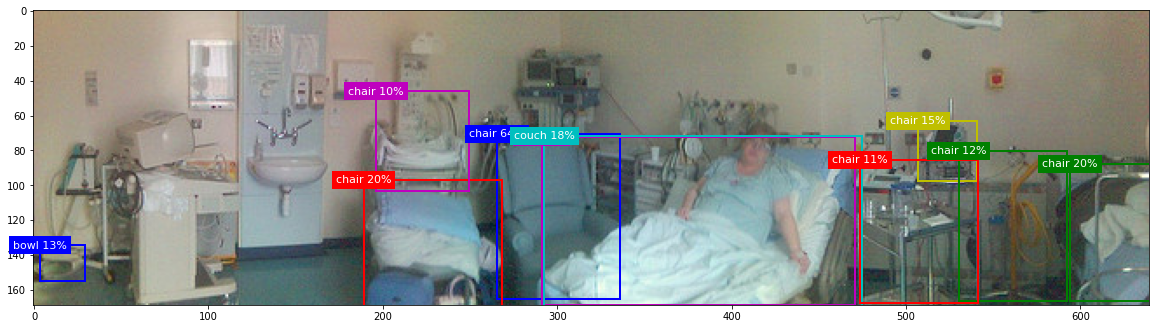

In [8]:
show_test_sample(img_idx = 0, bbox_num = 10)

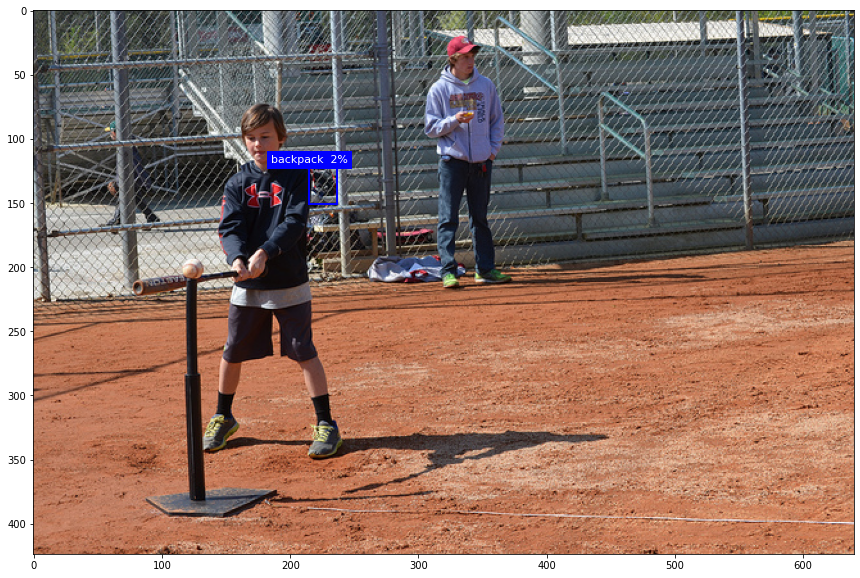

In [9]:
show_test_sample(img_idx = 999, bbox_num = 5, is_show_one = True)

## 使用gradio可视化

下面代码最终实现的效果如下：

![check_submit](test/image/check_submit.gif)

In [10]:
## 写一个简单的gradio应用来查看结果
import gradio as gr

In [11]:
# 定义输入输出函数
def show_test_sample_gr(
        img_idx = 0, 
        bbox_num = 10, 
        is_show_one = False,
        fig_width = 20,
        fig_height = 10
    ):
    """
    @param img_idx: 第几张图片
    @param bbox_num: 画出排名前bbox_num个bbox
    @param is_show_one: 是否只画出排名第bbox_num的bbox
    @param fig_width: plt图片的宽度
    @param fig_height: plt图片的高度
    """
    # 读取图片
    show_img_id = submit_data['image_id'][img_idx]
    # 找到show_img_id对应的图片
    img = Image.open('./dl_detection/test/' + '%07d.jpg'%show_img_id)
    # width, height = img.size
    bbox_list = bboxStrToList(submit_data['predictions'][img_idx])
    # 将排名前bbox_num个bbox画在图片上
    show_img_bboxs = []
    show_img_labels = []
    show_img_confs = []
    if is_show_one:
        bbox = bbox_list[bbox_num - 1]
        show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
        show_img_confs.append(bbox[4])
        show_img_labels.append(bbox[5])
    else:
        for i in range(bbox_num):
            bbox = bbox_list[i]
            show_img_bboxs.append([bbox[0], bbox[1], bbox[2] - bbox[0], bbox[3] - bbox[1]])
            show_img_confs.append(bbox[4])
            show_img_labels.append(bbox[5])
    # 画出bbox
    plt.figure(figsize=(fig_width, fig_height))
    plt.axis('off')
    draw_bboxs_with_conf(
        img, 
        show_img_bboxs, 
        show_img_labels, 
        show_img_confs
    )
    # img_with_bbox = plt2np(plt)
    # plt.savefig("tmp.png")
    # img_with_bbox = Image.open("tmp.png")
    return plt.gcf()

In [12]:
# 简单UI界面设计
with gr.Blocks() as demo:
    gr.Markdown("""
    # 查看测试集结果

    在这里我们最终提交的数据在测试集上的结果，可以通过调整参数来查看不同的结果。

    - `img_idx`: 第几张图片
    - `bbox_num`: 画出排名前bbox_num个bbox
    - `is_show_one`: 是否只画出排名第bbox_num的bbox
    - `fig_width`: plt图片的宽度
    - `fig_height`: plt图片的高度

    > 使用`fig_width`和`fig_height`成比例的缩放直接可以得到标签字体变大变小的效果
    """)
    with gr.Column():
        with gr.Row():
            img_idx = gr.inputs.Slider(minimum=0, maximum=len(submit_data)-1, step=1, default=0, label="img_idx")
            bbox_num = gr.inputs.Slider(minimum=1, maximum=300, step=1, default=10, label="bbox_num")
        with gr.Row():
            fig_width = gr.inputs.Slider(minimum=1, maximum=50, step=1, default=20, label="fig_width")
            fig_height = gr.inputs.Slider(minimum=1, maximum=50, step=1, default=10, label="fig_height")
    with gr.Row():
        is_show_one = gr.inputs.Checkbox(default=False, label="is_show_one")
        submit_button = gr.Button(label="submit")
    
    
    img_plot = gr.Plot()

    submit_button.click( 
        show_test_sample_gr , 
        inputs=[img_idx, bbox_num, is_show_one, fig_width, fig_height], 
        outputs=img_plot
    )

demo.launch()

d:\anaconda\lib\site-packages\gradio\inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
d:\anaconda\lib\site-packages\gradio\inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
d:\anaconda\lib\site-packages\gradio\inputs.py:121: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
d:\anaconda\lib\site-packages\gradio\inputs.py:124: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(value=default, label=label, optional=optional)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "d:\anaconda\lib\site-packages\gradio\routes.py", line 437, in run_predict
    output = await app.get_blocks().process_api(
  File "d:\anaconda\lib\site-packages\gradio\blocks.py", line 1352, in process_api
    result = await self.call_function(
  File "d:\anaconda\lib\site-packages\gradio\blocks.py", line 1077, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "d:\anaconda\lib\site-packages\anyio\to_thread.py", line 31, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "d:\anaconda\lib\site-packages\anyio\_backends\_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "d:\anaconda\lib\site-packages\anyio\_backends\_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "C:\Users\dongl\AppData\Local\Temp/ipykernel_14972/1751227581.py", line 33, in show_test_sample_gr
    bbox = bbox_list[i]
IndexError: list index out of range
Traceback (most rec